In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import seaborn as sns

# Classificação das EPDs

Uma equação envolvendo as derivadas parciais de uma função desconhecida de duas ou
mais variáveis independentes é chamada equação diferencial parcial ou EDP. Por exemplo,

\begin{align}
\frac{\partial^2 u}{\partial x^2} + 2 xy \frac{\partial^2 u}{\partial y^2} + u &=1\\
\frac{\partial^3 u}{\partial x^2 \partial y} + x \frac{\partial^2 u}{\partial y^2} + 8 u &= 5y\\
(\frac{\partial^2 u}{\partial x^2})^3 + 6 \frac{\partial^3 u}{\partial x \partial y^2} &= x \\
\frac{\partial^2 u}{\partial x^2} + x u \frac{\partial u}{\partial y} &=x
\end{align}

A ordem de uma EDP é aquela da derivada parcial de maior ordem que aparece na
equação. Por exemplo, as Equações (3) e (4) são de segunda e terceira ordens,
respectivamente.

Por causa de sua ampla gama de aplicações na engenharia, nosso tratamento das
EDPs se concentrará nas equações diferenciais de segunda ordem. Para duas variáveis in-
dependentes, tais equações podem ser expressas na seguinte forma geral:

$$
A \frac{\partial^2 u}{\partial x^2} + B \frac{\partial^2 u}{\partial x \partial y} + C \frac{\partial^2 u}{\partial y^2} + D = 0
$$

onde $A$, $B$ e $C$ são funções de $x$ e $y$ e $D$ é uma função de $x$, $y$, $u$, $\partial u/\partial x$ , e $\partial u/ \partial y$. Dependendo dos valores dos coeficientes dos termos de segunda ordem — $A$, $B$ , $C$ —, a equação acima pode ser classificada em uma de três categorias. 

<p align="center">
<img src="./images/11-clas.png" width=600 height=400 />
</p>

Essa classificação, que é baseada no método das características (veja, por exemplo, Vichnevetsky, 1981, ou Lapidus e Pinder, 1981), é útil porque cada categoria está relacionada com contexto de problemas de engenharia específicos e distintos que exigem técnicas de solução especiais. Deve ser observado que, para os casos nos quais $A$, $B$ e $C$ dependam de $x$ e $y$, na realidade, a equação pode cair em categorias diferentes, dependendo da posição do domínio para o qual a equação é válida. Por simplicidade, limitaremos a discussão seguinte às EDPs que permanecem exclusivamente em uma das categorias.

As *equações elípticas* são tipicamente usadas para caracterizar sistemas estacionários. Como na equação de Laplace na tabela, isso é indicado pela ausência de uma derivada no tempo. Assim, essas equações são usadas tipicamente para determinar distribuições estacionárias de uma incógnita em duas dimensões espaciais.

Em contraste à categoria elíptica, as *equações parabólicas* determinam como uma
incógnita varia tanto no espaço quanto no tempo. Isso se manifesta pela presença tanto de
derivadas espaciais quanto temporais na equação de condução de calor na tabela.
Tais casos são conhecidos como problemas de propagação porque a solução se "propaga"
ou varia no tempo.

A classe final de EDPs, a categoria *hiperbólica*, também trata de problemas de
propagação. Entretanto, uma diferença importante manifestada pela equação de onda na
tabela é que a incógnita é caracterizada pela segunda derivada com relação ao tempo. Como conseqüência, a solução oscila.

# Diferenças Finitas: Equações Elípticas

As equações elípticas na engenharia são usadas tipicamente para caracterizar problemas
de contorno estacionários. Antes de mostrar como eles podem ser resolvidos, ilustraremos como um caso simples — a equação de Laplace — é deduzido de um contexto de problema físico.

## A Equação de Laplace

A Figura abaixo mostra um elemento na face de uma placa retangular fina de espessura
$\Delta z$. A placa é isolada em toda parte, exceto nas bordas, onde a temperatura pode ser fixada em um nível prescrito. O isolamento e o fato de a placa ser fina significam que a transferência de calor é limitada às direções $x$ e $y$. No estado estacionário, o fluxo de calor para dentro do elemento em um período unitário $\Delta t$ deve ser igual ao fluxo para fora, como em

$$
q(x) \Delta y \Delta z \Delta t + q(y) \Delta x \Delta z \Delta t = q(x + \Delta x) \Delta y \Delta z \Delta t + q(y + \Delta y) \Delta x \Delta z \Delta t
$$

<p align="center">
<img src="./images/11-laplace1.png" width=400 height=400 />
</p>

onde $q(x)$ e $q(y)$ são os fluxos de calor nas direções $x$ e $y$, respectivamente $[cal/(cm^2 · s)]$. Dividindo por $\Delta z$ e $\Delta t$ e agrupando os termos, obtemos

$$
[q(x) - q(x + \Delta x)]\Delta y + [q(y) - q(y + \Delta y)]\Delta x = 0
$$

Multiplicando o primeiro termo por $\Delta x/ \Delta x$ e o segundo por $\Delta y/ \Delta y$, obtemos

$$
\frac{q(x) - q(x+\Delta x)}{\Delta x} \Delta x \Delta y + \frac{q(y) - q(y+\Delta y)}{\Delta y} \Delta y \Delta x = 0
$$

Dividindo por $\Delta x \Delta y$ e tomando o limite, resulta em

$$
- \frac{\partial q}{\partial x} - \frac{\partial q}{\partial y} = 0.
$$

Essa equação é uma equação diferencial parcial que é uma expressão da conservação da energia na placa. Entretanto, a menos que os fluxos de calor sejam especificados nas bordas da placa, ela não pode ser resolvida. Como as condições de contorno para a temperatura são dadas, a Equação acima deve ser reformulada em termos da temperatura. A ligação entre o fluxo e a temperatura é fornecida pela *lei de condução de calor de Fourier*, que pode ser representada por:

$$
q_i = -k\rho C \frac{\partial T}{\partial i}
$$

onde $q_i$ é o fluxo de calor na direção da dimensão $i \;\; [cal/(cm^2 · s)], \; k$ é o *coeficiente de difusividade térmica* $(cm^2/s)$, $\rho$ é a densidade do material $(g/cm^3), C$ é a capacidade calorífica do material $[cal/(g · ^\circ C)]$ e $T$ é a temperatura, que é definida por

$$
T = \frac{H}{\rho C V}
$$

onde $H$ é o calor (cal) e $V$ é o volume ($cm^3$). Às vezes, é definido um único termo,

$$
k' = k \rho C
$$

onde $k'$ é conhecido como *coeficiente de condutividade térmica* $[cal/(s · cm · ^\circ C)]$. Em ambos os casos, $k$ e $k'$ são parâmetros que refletem quão bem o material conduz o calor.

A lei de Fourier é chamada algumas vezes *equação constitutiva*. Ela recebe essa designação porque fornece um mecanismo que define as interações internas do sistema. A inspeção da da equação da lei de Fourier indica que ela especifica que o fluxo de calor perpendicular ao eixo $i$ é proporcional ao gradiente ou inclinação da temperatura na direção $i$. O sinal negativo garante que um fluxo positivo na direção $i$ resulta de uma inclinação negativa de alta para baixa temperatura. A substituição da equação da Fouorier na equação de conservação resulta em

$$
\frac{\partial^2 T}{\partial x^2} + \frac{\partial^2 T}{\partial y^2}  = 0
$$

que é a **equação de Laplace**. Observe que para o caso no qual existem fontes ou sumidouros de calor no domínio bidimensional, a equação pode ser representada por

$$
\frac{\partial^2 T}{\partial x^2} + \frac{\partial^2 T}{\partial y^2}  = f(x,y)
$$

onde $f (x, y)$ é a função descrevendo as fontes ou sumidouros de calor. A equação acima é
conhecida como *equação de Poisson*.

## Técnicas de Soluções

Para a solução numérica, representações por *diferenças finitas*, baseadas no tratamento da placa como uma grade de pontos discretos, substituem as derivadas parciais na equação de Laplace. Como descrito a seguir, a EDP é transformada em uma equação de diferença algébrica.

<p align="center">
<img src="./images/11-diff.png" width=400 height=400 />
</p>

### A Equação de Diferença de Laplace

As diferenças centradas baseadas no esquema de grade são

\begin{align*}
\frac{\partial^2 T}{\partial x^2} &= \frac{T_{i+1, j} - 2 T_{i,j}+ T_{i-1,j}}{\Delta x^2}\\
\frac{\partial^2 T}{\partial y^2} &= \frac{T_{i, j+1} - 2 T_{i,j}+ T_{i,j-1}}{\Delta y^2}
\end{align*}

que têm erros de $O[\Delta(x)^2]$ e $O[\Delta(y)^2]$, respectivamente. Substituindo essas expressões na equação de Laplace, obtemos

$$
\frac{T_{i+1, j} - 2 T_{i,j}+ T_{i-1,j}}{\Delta x^2} + \frac{T_{i, j+1} - 2 T_{i,j}+ T_{i,j-1}}{\Delta y^2} = 0
$$

Para a grade quadrada, igual a figura, $\Delta x = \Delta y$, e, agrupando os termos, a equação se torna

$$
T_{i+1, j} + T_{i-1,j} + T_{i, j+1} + T_{i,j-1} - 4 T_{i,j} = 0
$$

Essa relação, que é válida para todos os pontos interiores da placa, é conhecida como
*equação de diferença de Laplace*.

Além disso, devem ser especificadas condições de contorno ao longo das bordas da
placa para se obter uma **única solução**. O caso mais simples é quando a temperatura nas
bordas é mantida em valores fixos. Isso é chamado condição de contorno de Dirichlet.
Esse é o caso na figura abaixo, na qual as bordas são mantidas a temperaturas constantes. **Nessa figura a indexação das linhas e colunas é diferente do padrão do Python e C e é baseado no Fortran. Para ter a indexação do Python trocam a ordem (i, j) para (j, i) e o elemento do canto superior esquerdo é (1,1)**

<p align="center">
<img src="./images/11-const.png" width=400 height=400 />
</p>


Para o caso ilustrado na figura, um balanço para o nó $(1, 1)$ é, de acordo com a
equação de diferença de Laplace,

$$
T_{21} + T_{01} + T_{12} + T_{10} - 4 T_{11} = 0
$$

Entretanto, $T_{01} = 75$ e $T_{10} = 0$, e, portanto, a equação acima pode ser expressa como

$$
-4 T_{11} + T_{12} + T_{21} = 75
$$

Equações análogas podem ser deduzidas para os outros pontos interiores.

[[100 100 100 100 100 100 100 100 100 50]
 [75 T_{11} T_{12} T_{13} T_{14} T_{15} T_{16} T_{17} T_{18} 50]
 [75 T_{21} T_{22} T_{23} T_{24} T_{25} T_{26} T_{27} T_{28} 50]
 [75 T_{31} T_{32} T_{33} T_{34} T_{35} T_{36} T_{37} T_{38} 50]
 [75 T_{41} T_{42} T_{43} T_{44} T_{45} T_{46} T_{47} T_{48} 50]
 [75 T_{51} T_{52} T_{53} T_{54} T_{55} T_{56} T_{57} T_{58} 50]
 [75 T_{61} T_{62} T_{63} T_{64} T_{65} T_{66} T_{67} T_{68} 50]
 [75 T_{71} T_{72} T_{73} T_{74} T_{75} T_{76} T_{77} T_{78} 50]
 [75 T_{81} T_{82} T_{83} T_{84} T_{85} T_{86} T_{87} T_{88} 50]
 [0 0 0 0 0 0 0 0 0 50]]


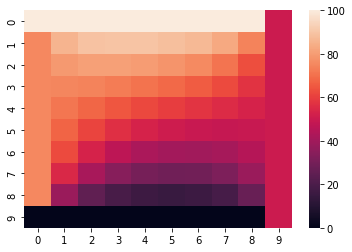

In [52]:
n = 10
variables = [sp.symbols('T_{'+str(i)+str(j)+'}') for i in range(n) for j in range(n)]
T = np.array([variables[i*n:i*n + n] for i in range(n)])

T[:, 0] = 75
T[0, :] = 100
T[n-1, :] = 0
T[:, n-1] = 50

print(T)

eqs = []
for i in range(1, n-1):
    for j in range(1, n-1):
        eq = T[i+1, j] + T[i-1, j] + T[i, j+1] + T[i, j-1] - 4*T[i, j]
        eqs.append(eq)

        
variables_final =  [item for item in T.flatten() if isinstance(item, sp.core.symbol.Symbol)]
res = sp.solve(eqs, variables_final)
temps =np.array( [float(v) for v in res.values()])
##temps = np.array( [float(v) for v in list(res)[0]])
temps = temps.reshape(-1, n-2)
T[1:-1, 1:-1] = temps 
T = T.astype(float)


sns.heatmap( T )
plt.show()

**Exercicio:** Implemente esse algoritmo usando Numpy

### O Método de Liebmann

A maioria das soluções numéricas da equação de Laplace envolve sistemas que são muito
maiores do que o do exemplo acima. Por exemplo, uma grade 10 por 10 envolve 100
equações algébricas lineares.

Observe que existe um máximo de cinco termos desconhecidos por linha na Equação de diferença de Laplace do exemplo acima. Para grades de tamanho maior, isso quer dizer que um número significativo de termos será zero. Quando aplicados a tais sistemas esparsos, métodos de eliminação para a matriz toda desperdiçam uma grande quantidade de memória computacional armazenando esses zeros. Por essa razão, os métodos aproximados fornecem uma abordagem viável para obter soluções de equações elípticas. A abordagem mais comumente usada é a do método de *Gauss-Seidel*, que, quando aplicado a EDPs, também é conhecido como *método de Liebmann*. Nessa técnica, a Equação de diferença de Laplace é expressa por

$$
T_{i,j} = \frac{T_{i+1, j} + T_{i-1,j} + T_{i, j+1} + T_{i, j-1}}{4}
$$

e resolvida iterativamente de $j = 1$ a $n$ e de $i = 1 $a $m$. Como a equação de diferença de Laplace é diagonal dominante, esse procedimento eventualmente convergirá para uma solução estável. A sobre-relaxação algumas vezes é usada para acelerar a taxa de convergência por meio da aplicação da seguinte fórmula, depois de cada iteração:

$$
T_{i,j}^{\text{novo}} = \lambda T_{i,j}^{\text{novo}} + (1- \lambda) T_{i,j}^{\text{velho}}
$$

onde $T_{i,j}^{\text{novo}}$ e $T_{i,j}^{\text{velho}}$ são os valores de $T_{i,j}$ da iteração atual e da anterior, respectivamente e $\lambda$ é um fator de peso que é fixado entre 1 e 2.

Como no método de Gauss-Seidel convencional, as iterações são repetidas até que
os valores absolutos de todos os erros relativos porcentuais $(\epsilon_a)_{i, j}$ caiam abaixo de um critério de parada pré-especificado  $(\epsilon_s)$ . São obtidas estimativas para esses erros relativos porcentuais por

$$
|(\epsilon_a)_{i, j}| = |\frac{T_{i,j}^{\text{novo}} - T_{i,j}^{\text{velho}}}{T_{i,j}^{\text{novo}}}|
$$

##### Exemplo: 

Use o método de Liebmann (Gauss-Seidel) para determinar a temperatura da placa aquecida na Figura acima. Use sobre-relaxação com um valor de $1.5$ para o fator de peso e itere até $\epsilon_s = 1\%$.

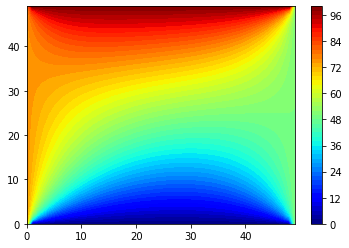

In [58]:
#from numpy import meshgrid , arange , full , linalg

#Build a mesh
X , Y = np.meshgrid(np.arange (0 , 50) , np.arange (0 , 50) )

#Initialize
U0 = 30 # first guess
U= np.full ((50 , 50) , U0 , dtype = float )
V= np.full ((50 , 50) , U0 , dtype = float )
# Boundary contitions
Unorth = 100
Usouth = 0
Uwest = 75
Ueast = 50

U [49 ,:] = Unorth #Dirichlet
U [0 ,:] = Usouth #Dirichlet
U [: , 0] = Uwest #Dirichlet
U [: , 49:] = Ueast #Dirichlet
#U [: , 48:] = Ueast #Neumann


#Iteration settings
iteration =0
dxy = 1
imax = 10000

#Iterate
while iteration < imax :
    #
    # Calculate central point
    for i in range(1 , 49 , dxy ) :
        for j in range (1 , 49 , dxy ) :
            U [i , j ] = ( U [i -1 , j ]
            + U [ i +1 , j ]
            + U [i ,j -1]
            + U [i , j +1]) /4
    iteration +=1
    error = ( np.linalg.norm(U) - np.linalg.norm(V)) \
    / np.linalg.norm ( U )


    # V = U.copy()
    for i in range (0 ,50) :
        for j in range (0 ,50): 
            V[i][j]= U[i][j]

    if error < 0.0001: 
        iteration = imax


plt.contourf(X ,Y ,U , 60, cmap = plt.cm.jet )
#sns.heatmap(U)
plt.colorbar()
plt.show()

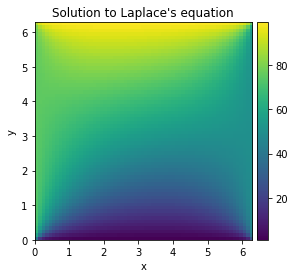

In [4]:
from pde import CartesianGrid, solve_laplace_equation

grid = CartesianGrid([[0, 2 * np.pi]] * 2, 64)
#bcs = [{"value": "sin(y)"}, {"value": "sin(x)"}]
bc_x = [{'value': 75}, {"value":50}]
bc_y = [{"value":0}, {'value': 100} ]
bcs = [bc_x, bc_y]

res = solve_laplace_equation(grid, bcs)
res.plot()

### Variáveis Secundárias

Como sua distribuição é descrita pela equação de Laplace, a temperatura é considerada a
variável primária no problema da placa aquecida. Nesse caso, bem como para outros
problemas envolvendo EDPs, variáveis secundárias também podem ter interesse. Na realidade, em certos contextos de engenharia, as variáveis secundárias podem de fato ser mais importantes.

Para a placa aquecida, uma variável secundária é a taxa de fluxo de calor através
da superfície da placa. Essa quantidade pode ser calculada a partir da lei de Fourier.
Aproximações por diferenças finitas centrais para as primeiras derivadas podem ser substituídas na equação da condução de Fourier para fornecer os seguintes valores para o fluxo de calor nas dimensões $x$ e $y$:

\begin{align*}
q_x  &= -k' \frac{T_{i+1, j} - T_{i-1, j}}{2 \Delta x}\\
q_y &= -k' \frac{T_{i, j+1} - T_{i, j-1}}{2 \Delta y}
\end{align*}

O fluxo de calor resultante pode ser calculado a partir dessas duas quantidades por

$$
q_n = \sqrt{q_x^2 + q_y^2}
$$

onde a direção de qn é dada por

$$
\theta = \tan^{-1}(\frac{q_y}{q_x})
$$

para $q_x > 0 $ e 

$$
\theta = \tan^{-1}(\frac{q_y}{q_x}) + \pi
$$

para $q_x < 0$. Lembre-se de que o ângulo pode ser expresso em graus multiplicando-o por
$180^\circ/\pi$. Se $q_x = 0, \theta$ é $\pi/2 (90^\circ)$ ou $3\pi/2 (270^\circ)$, dependendo de $q_y$ ser positivo ou negativo, respectivamente.

#### Exemplo: Distribuição do Fluxo para uma Placa Aquecida

Use os resultados do Exemplo anterior para determinar a distribuição de fluxo de calor na placa aquecida . Suponha que a placa tenha $40 \times 40 cm$ e seja feita de alumínio $[k'  = 0.49 cal/(s · cm · ^\circ C)]$.

**Resposta:**

Para $i = j = 1$

\begin{align*}
q_x & = -0.49 \frac{33.29 - 75}{2 (10)} = 1.022 \;\; cal/(cm^2 · s)\\
q_y & = -0.49 \frac{63.21 - 0}{2 (10)} = -1.549 \;\; cal/(cm^2 · s)
\end{align*}

O fluxo resultante pode ser calculado

$$
q_n = \sqrt{(1.022)^2 + (-1.549)^2} = 1.856 \;\;cal/(cm^2 · s)
$$

e o ângulo de sua trajetória

$$
\theta = \tan^{-1}(\frac{-1.549}{1.022}) = -0.9875 \times \frac{180^\circ}{\pi} = -56.58^\circ
$$

Assim, nesse ponto, o fluxo de calor aponta para baixo e para a direita. Os valores nos ou-
tros pontos da grade podem ser calculados;

<p align="center">
<img src="./images/11-flux.png" width=400 height=400 />
</p>

**Exercicio: Reproduz a imagem usando o Python**

### Condições de Contorno

Como os fatores complicadores estão ausentes, a placa retangular com condições de contorno fixas foi um contexto ideal para mostrar como as EDPs elípticas podem ser resolvidas numericamente. Agora, consideraremos outras questões que vão expandir nossos recursos para tratar problemas mais realísticos. Estes envolvem bordas nas quais as derivadas são especificadas e bordas que têm forma irregular.

#### Condições de Contorno na Derivada

A condição de *contorno de Dirichlet* ou *fixa*, discutida até este ponto, é apenas uma dentre os diversos tipos que são utilizados em equações diferenciais parciais. Uma alternativa comum é o caso em que a derivada é dada. Isso em geral é conhecido como condição de *contorno de Neumann*. Para o problema da placa aquecida, isso quer dizer especificar o fluxo de calor em vez da temperatura na borda. Um exemplo é a situação na qual a borda é isolada. Nesse caso, o qual é conhecido como uma condição de contorno natural, a derivada é nula. Essa conclusão é tirada diretamente da equação de condução de Fourier, pois isolar a fronteira significa que o fluxo de calor (e, conseqüentemente, o gradiente) deve ser nulo. Outro exemplo seria quando se perde calor pela aresta por mecanismos previsíveis tais como radiação e condução.

A figura abaixo descreve um nó $(0, j)$ na aresta esquerda da placa aquecida. 

<p align="center">
<img src="./images/11-neu1.png" width=300 height=300 />
</p>

Aplicando-se a equação da diferença de Laplace a esse ponto, obtemos

$$
T_{1, j} + T_{−1, j} + T_{0, j+1} + T_{0, j−1} − 4 T_{0, j} = 0
$$

Observe que um ponto imaginário $(−1, j)$, localizado fora da placa, é necessário nessa
equação. Embora esse ponto exterior fictício possa parecer representar um problema, na
realidade, serve como veículo para incorporar a condição de contorno na derivada ao
problema. Isso é feito representando-se a primeira derivada na dimensão $x$ em $(0, j)$ por
uma diferença dividida finita

$$
\frac{\partial T}{\partial x} \approx \frac{T_{1,j} - T_{-1, j}}{2 \Delta x}
$$

que pode ser reescrita como

$$
T_{-1, j} = T_{1,j} - 2 \Delta x \frac{\partial T}{\partial x}
$$

Agora, temos uma relação para $T_{−1, j}$ que realmente inclui a derivada. Ela pode ser substituída na equação principla para fornecer

$$
2T_{1, j} − 2 \Delta x  \frac{\partial T}{\partial x}+ T_{0, j+1} + T_{0, j−1} − 4T_{0, j} = 0
$$

Assim, incorporamos a derivada no balanço.

Relações análogas podem ser desenvolvidas para condições de contorno na derivada
nas outras arestas. O seguinte exemplo mostra como isso é feito para a placa aquecida.

# Diferenças Finitas: Equações Parabolicas

Começaremos nossa discussão de PDEs parabolicas com equações de convecção lineares e não lineares 1D, a equação de difusão 1D e a equação de Burgers 1D. Esperamos que você goste deles!

## Conveccão linear 1D

A *equação de convecção linear unidimensional* é o modelo mais simples e básico que pode ser usado para aprender algo sobre solução numérica de PDEs. É surpreendente que esta pequena equação possa nos ensinar tanto! Aqui está:

$$
\begin{equation*}
\frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = 0
\end{equation*}
$$

A equação representa uma *onda* se propagando com velocidade $c$ na direção $x$, sem mudança de forma. Por esse motivo, às vezes é chamada de *equação de onda unidirecional* (às vezes também de *equação de advecção*).

Com uma condição inicial $u(x,0)=u_0(x)$, a equação tem uma solução exata dada por:

$$
\begin{equation*}
u(x,t)=u_0(x-ct)
\end{equation*}
$$

Vá em frente: verifique. Pegue a derivada de tempo e espaço e coloque-as na equação para ver se ela é válida!

Olhe para a solução exata por um momento ... sabemos duas coisas sobre isso:

1. sua forma não muda, sendo sempre a mesma da onda inicial, $u_0$, apenas deslocada na direção $x$; e
2. é constante ao longo das chamadas **curvas características**, $x-ct=$constant. Isso significa que para qualquer ponto no espaço e no tempo, você pode voltar ao longo da curva característica para $t=0$ para saber o valor da solução.



<p align="center">
<img src="./images/11-characteristics.png" width=500 height=250 />
</p>

Por que chamamos as equações de *lineares*? Os PDEs podem ser lineares ou não lineares. Em uma equação linear, a função desconhecida $u$ e suas derivadas aparecem apenas em termos lineares, ou seja, não há produtos, potências ou funções transcendentais aplicadas a elas.

Qual é a característica mais importante das equações lineares? Você se lembra? Caso você tenha esquecido: as soluções podem ser sobrepostas para gerar novas soluções que ainda satisfaçam a equação original. Isso é super útil!

## Diferenças Finitas para Convicção

Nas lições anteriores, discretizamos as derivadas de espaço; agora temos derivadas no tempo *e* no espaço, então precisamos discretizar em relação a *ambas* essas variáveis.

Imagine um gráfico *espaço-tempo*, onde as coordenadas na direção vertical representam o avanço no tempo—por exemplo, de $t^n$ para $t^{n+1}$—e as coordenadas na direção horizontal se movem em espaço: pontos consecutivos são $x_{i-1}$, $x_i$ e $x_{i+1}$. Isso cria uma grade onde um ponto tem um índice temporal e espacial. Aqui está uma representação gráfica da grade espaço-tempo:

$$
\begin{matrix}
t^{n+1} & \rightarrow & \bullet && \bullet && \bullet \\
t^n & \rightarrow & \bullet && \bullet && \bullet \\
& & x_{i-1} && x_i && x_{i+1}
\end{matrix}
$$

Para a solução numérica de $u(x,t)$, usaremos subscritos para denotar a posição espacial, como $u_i$, e sobrescritos para denotar o instante temporal, como $u^n$. Em seguida, rotularíamos a solução no ponto médio superior na grade acima da seguinte forma:
$u^{n+1}_{i}$.

Cada ponto da grade abaixo possui um índice $i$, correspondente à posição espacial e crescente à direita, e um índice $n$, correspondente ao instante de tempo e crescente. Um pequeno segmento de grade teria os seguintes valores da solução numérica em cada ponto:

$$
\begin{matrix}
& &\bullet & & \bullet & & \bullet \\
& &u^{n+1}_{i-1} & & u^{n+1}_i & & u^{n+1}_{i+1} \\
& &\bullet & & \bullet & & \bullet \\
& &u^n_{i-1} & & u^n_i & & u^n_{i+1} \\
& &\bullet & & \bullet & & \bullet \\
& &u^{n-1}_{i-1} & & u^{n-1}_i & & u^{n-1}_{i+1} \\
\end{matrix}
$$

Outra forma de explicar nossa grade de discretização é dizer que ela é construída com passos constantes no tempo e no espaço, $\Delta t$ e $\Delta x$, como segue:

$$
\begin{align*}
x_i &= i\, \Delta x \quad \text{and} \quad t^n= n\, \Delta t \\
u_i^n &= u(i\, \Delta x, n\, \Delta t)
\end{align*}
$$

## Discritizando a Equação do Modelo

Vamos ver como discretizar a equação de convecção linear 1D no espaço e no tempo. Por definição, a derivada parcial em relação ao tempo muda apenas com o tempo e não com o espaço; sua forma discretizada altera apenas os índices $n$. Da mesma forma, a derivada parcial em relação a $x$ muda com o espaço e não com o tempo, e apenas os índices $i$ são afetados.

Vamos discretizar a coordenada espacial $x$ em pontos indexados de $i=0$ a $N$, e então entrar em intervalos de tempo discretos de tamanho $\Delta t$.

A partir da definição de uma derivada (e simplesmente removendo o limite), sabemos que para $\Delta x$ suficientemente pequeno:

$$
\begin{equation*}
\frac{\partial u}{\partial x}\approx \frac{u(x+\Delta x)-u(x)}{\Delta x}
\end{equation*}
$$

Esta fórmula pode ser aplicada a qualquer ponto $x_i$. Mas observe que não é a única maneira de estimar a derivada. A interpretação geométrica da primeira derivada $\partial u/ \partial x$ em qualquer ponto é que ela representa a inclinação da tangente à curva $u(x)$. No esboço abaixo, mostramos uma linha de inclinação em $x_i$ e a marcamos como "exata". Se a fórmula escrita acima for aplicada em $x_i$, ela aproxima a derivada usando o próximo ponto da grade espacial: é então chamada de fórmula de _diferença direta_.

Mas, como mostrado no esboço abaixo, também podemos estimar a derivada espacial usando o ponto atrás de $x_i$, caso em que é chamado de _diferença regressiva_. Poderíamos até usar os dois pontos de cada lado de $x_i$ e obter o que chamamos de _diferença central_ (mas nesse caso o denominador seria $2\Delta x$).

<p align="center">
<img src="./images/11-FDapproxiamtions.png" width=400 height=400 />
</p>

Temos três maneiras possíveis de representar uma forma discreta de $\partial u/ \partial x$:

* Diferença progressiva: usa $x_i$ e $x_i + \Delta x$,
* Diferença regressiva: usa $x_i$ e $x_i- \Delta x$,
* Diferença central: usa dois pontos em cada lado de $x_i$.

O esboço acima também sugere que algumas fórmulas de diferenças finitas podem ser melhores que outras: parece que a aproximação da *diferença central* está mais próxima da inclinação da derivada "exata". Curioso se isso é apenas um efeito da nossa imagem exagerada? Mostraremos mais tarde como tornar essa observação rigorosa!

As três fórmulas são:

$$
\begin{align*}
\frac{\partial u}{\partial x} & \approx & \frac{u(x_{i+1})-u(x_i)}{\Delta x} \quad\text{Avançar}\\
\frac{\partial u}{\partial x} & \approx & \frac{u(x_i)-u(x_{i-1})}{\Delta x} \quad\text{Backward}\\
\frac{\partial u}{\partial x} & \approx & \frac{u(x_{i+1})-u(x_{i-1})}{2\Delta x} \quad\text{ Central}
\end{align*}
$$

O método de Euler é equivalente a usar um esquema de diferença direta para a derivada temporal. Vamos ficar com isso e escolher o esquema de diferença para trás para a derivada espacial. Nossa equação discreta é então:

$$
\begin{equation*}
\frac{u_i^{n+1}-u_i^n}{\Delta t} + c \frac{u_i^n - u_{i-1}^n}{\Delta x} = 0
\end{equation*}
$$

onde $n$ e $n+1$ são dois passos consecutivos no tempo, enquanto $i-1$ e $i$ são dois pontos vizinhos da coordenada $x$ discretizada. Com as condições iniciais dadas, a única incógnita nesta discretização é $u_i^{n+1}$. Resolvemos essa incógnita para obter uma equação que nos permite avançar no tempo, como segue:

$$
\begin{equation*}
u_i^{n+1} = u_i^n - c \frac{\Delta t}{\Delta x}(u_i^n-u_{i-1}^n)
\end{equation*}
$$

Gostamos de fazer desenhos de um segmento de grade, mostrando os pontos de grade que influenciam nossa solução numérica. Isso é chamado de **estêncil**. Abaixo está o estêncil para resolver nossa equação modelo com a fórmula de diferenças finitas que escrevemos acima.

<p align="center">
<img src="./images/11-FTBS_stencil.png" width=250 height=250 />
</p>


## E Computar!

In [2]:
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 16

Como primeiro exercício, vamos resolver a equação de convecção linear 1D com uma condição inicial de *onda quadrada*, definida da seguinte forma:

$$
\begin{equation*}
u(x,0)=\begin{cases}2 & \text{onde } 0.5\leq x \leq 1,\\
1 & \text{em qualquer outro lugar em } (0, 2)
\end{cases}
\end{equation*}
$$

Também precisamos de uma condição de contorno em $x$: seja $u=1$ em $x=0$. Nosso domínio espacial para a solução numérica cobrirá apenas o intervalo $x\in (0, 2)$.

<p align="center">
<img src="./images/11-squarewave.png" width=250 height=200 />
</p>>

Agora vamos definir algumas variáveis; queremos fazer uma malha de pontos uniformemente espaçados dentro de nosso domínio espacial. No código abaixo, definimos uma variável chamada `nx` que será o número de pontos da malha espacial, e uma variável `dx` que será a distância entre qualquer par de pontos da malha adjacentes. Também podemos definir um passo no tempo, `dt`, um número de passos, `nt` e um valor para a velocidade da onda: gostamos de manter as coisas simples e fazer $c=1$.



In [4]:
# Set parameters.
nx = 41  # number of spatial discrete points
L = 2.0  # length of the 1D domain
dx = L / (nx - 1)  # spatial grid size
nt = 25  # number of time steps
dt = 0.02  # time-step size
c = 1.0  # convection speed

# Define the grid point coordinates.
x = np.linspace(0.0, L, num=nx)

Também precisamos definir nossas condições iniciais. Aqui, usamos a função NumPy `numpy.ones()` definindo um array que tem o elemento `nx` com cada valor igual a $1$. Quão útil! Então *alteramos uma fatia* desse array para o valor $u=2$, para obter a onda quadrada, e imprimimos o array inicial apenas para admirá-lo. Mas quais valores devemos mudar? O problema afirma que precisamos mudar os índices de `u` de modo que a onda quadrada comece em $x = 0,5$ e termine em $x = 1$.

Podemos usar a função [`np.where()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html) para retornar uma lista de índices onde o vetor $x $ atende a algumas condições.
A função [`np.logical_and()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.logical_and.html) calcula o valor de verdade de `x >= 0.5` **e ** `x <= 1.0`, em termos de elemento.

In [5]:
# Set initial conditions with 1.0 everywhere (for now).
u0 = np.ones(nx)
# Get a list of indices where 0.5 <= x <= 1.0.
mask = np.where(np.logical_and(x >= 0.5, x <= 1.0))
print(mask)

(array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]),)


Com a lista de índices, agora podemos atualizar nossas condições iniciais para obter uma forma de onda quadrada.

In [6]:
# Set initial condition u = 2.0 where 0.5 <= x <= 1.0.
u0[mask] = 2.0
print(u0)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Agora vamos dar uma olhada nessas condições iniciais que construímos com um gráfico útil.

(0.0, 2.5)

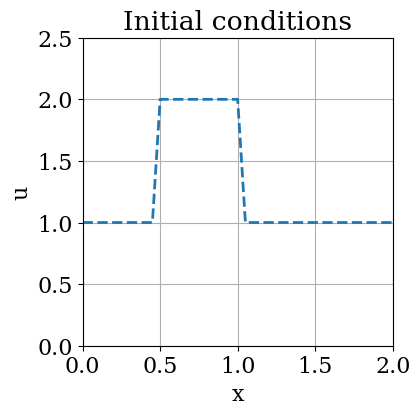

In [7]:
# Plot the initial conditions.
plt.figure(figsize=(4.0, 4.0))
plt.title('Initial conditions')
plt.xlabel('x')
plt.ylabel('u')
plt.grid()
plt.plot(x, u0, color='C0', linestyle='--', linewidth=2)
plt.xlim(0.0, L)
plt.ylim(0.0, 2.5)

Parece bem próximo do que esperávamos. Mas parece que os lados da onda quadrada não são perfeitamente verticais. Isso está certo? Pense um pouco.

Agora é hora de escrever algum código para a forma discreta da equação de convecção usando o esquema de diferenças finitas.

Para cada elemento do nosso array `u`, precisamos realizar a operação:

$$
u_i^{n+1} = u_i^n - c \frac{\Delta t}{\Delta x}(u_i^n-u_{i-1}^n)
$$

Armazenaremos o resultado em um novo array (temporário) `un`, que será a solução $u$ para o próximo passo de tempo. Repetiremos esta operação por quantos passos de tempo especificarmos e então poderemos ver até onde a onda viajou.

Primeiro inicializamos o array de espaço reservado `un` para manter os valores que calculamos para a etapa de tempo $n+1$, usando novamente a função NumPy `ones()`.

Então, podemos pensar que temos duas operações iterativas: uma no espaço e outra no tempo (aprenderemos de forma diferente mais tarde), então podemos começar aninhando um loop espacial dentro do loop de tempo, conforme mostrado abaixo. Você vê que o código para o esquema de diferenças finitas é uma expressão direta da equação discreta:

In [8]:
u = u0.copy()
for n in range(1, nt):
    un = u.copy()
    for i in range(1, nx):
        u[i] = un[i] - c * dt / dx * (un[i] - un[i - 1])

**Nota 1**—Enfatizamos acima que nosso problema físico precisa de uma condição de contorno em $x=0$. Aqui não precisamos impô-lo a cada iteração porque nossa discretização não altera o valor de u[0]: ele permanece igual a um e nossa condição de contorno é, portanto, satisfeita durante todo o cálculo!

**Nota 2**—Vamos aprender mais tarde que o código escrito acima é bastante ineficiente, e existem maneiras melhores de escrever isso, no estilo Python. Mas vamos continuar.

Agora vamos inspecionar nosso array de soluções depois de avançar no tempo com um gráfico de linhas.

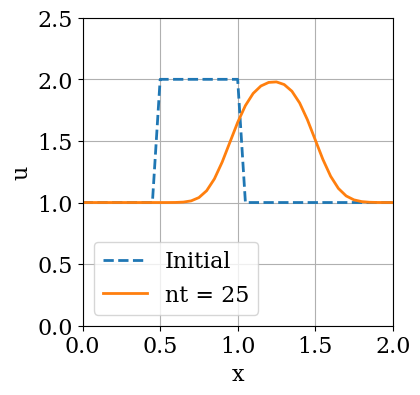

In [9]:
# Plot the solution after nt time steps
# along with the initial conditions.
plt.figure(figsize=(4.0, 4.0))
plt.xlabel('x')
plt.ylabel('u')
plt.grid()
plt.plot(x, u0, label='Initial',
            color='C0', linestyle='--', linewidth=2)
plt.plot(x, u, label='nt = {}'.format(nt),
            color='C1', linestyle='-', linewidth=2)
plt.legend()
plt.xlim(0.0, L)
plt.ylim(0.0, 2.5)

Isso é engraçado. Nossa onda quadrada definitivamente se moveu para a direita, mas não tem mais a forma de uma cartola. **O que está acontecendo?**

### Vá mais fundo

A solução difere da onda quadrada esperada porque a equação discretizada é uma aproximação da equação diferencial contínua que queremos resolver. Há erros: nós sabíamos disso. Mas a forma modificada da onda inicial é algo curioso. Talvez possa ser melhorado tornando o espaçamento da grade mais fino. Por que você não tenta? Será que isso ajuda?

## Erro de truncamento espacial

Lembre-se da aproximação de diferenças finitas que estamos usando para a derivada espacial:

$$
\begin{equation*}
\frac{\partial u}{\partial x}\approx \frac{u(x+\Delta x)-u(x)}{\Delta x}
\end{equation*}
$$

Nós a obtemos usando a definição da derivada em um ponto, e simplesmente removendo o limite, na suposição de que $\Delta x$ é muito pequeno. Mas já aprendemos com o método de Euler que isso introduz um erro, chamado *erro de truncamento*.

Usando uma expansão em série de Taylor para os termos espaciais agora, vemos que o esquema de diferença para trás produz um método de primeira ordem, no espaço.

$$
\begin{equation*}
\frac{\partial u}{\partial x}(x_i) = \frac{u(x_i)-u(x_{i-1})}{\Delta x} + \frac{\Delta x}{2} \frac{\partial^2 u}{\partial x^2}(x_i) - \frac{\Delta x^2}{6} \frac{\partial^3 u}{\partial x^3}(x_i )+ \cdots
\end{equation*}
$$

O termo dominante que é desprezado na aproximação de diferenças finitas é $\mathcal{O}(\Delta x)$. Também vemos que a aproximação *converge* para a derivada exata como $\Delta x \rightarrow 0$. Isso é uma boa notícia!

Em resumo, o esquema de diferença "forward-time/backward space" escolhido é de primeira ordem tanto no espaço quanto no tempo: os erros de truncamento são $\mathcal{O}(\Delta t, \Delta x)$. Voltaremos a isto!

## Convicção Não-linear

Vamos passar para a equação de convecção não linear, usando os mesmos métodos de antes. A equação de convecção 1-D é:

$$
\begin{equation*}
\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = 0
\end{equation*}
$$

A única diferença com o caso linear é que substituímos a velocidade constante da onda $c$ pela velocidade variável $u$. A equação é não linear porque agora temos um produto da solução e uma de suas derivadas: o produto $u\,\partial u/\partial x$. Isso muda tudo!

Vamos usar a mesma discretização da convecção linear: diferença para frente no tempo e diferença para trás no espaço. Aqui está a equação discretizada:

$$
\begin{equation*}
\frac{u_i^{n+1}-u_i^n}{\Delta t} + u_i^n \frac{u_i^n-u_{i-1}^n}{\Delta x} = 0
\end{equation*}
$$

Resolvendo para o único termo desconhecido, $u_i^{n+1}$, dá uma equação que pode ser usada para avançar no tempo:

$$
\begin{equation*}
u_i^{n+1} = u_i^n - u_i^n \frac{\Delta t}{\Delta x} (u_i^n - u_{i-1}^n)
\end{equation*}
$$

Há muito pouco que precisa mudar em relação ao código escrito até agora. Na verdade, usaremos a mesma condição inicial de onda quadrada. Mas vamos reinicializar a variável `u` com os valores iniciais e reinserir os parâmetros numéricos aqui, por conveniência (não precisamos mais de $c$).

In [10]:
# Set parameters.
nx = 41  # number of spatial discrete points
L = 2.0  # length of the 1D domain
dx = L / (nx - 1)  # spatial grid size
nt = 10  # number of time steps
dt = 0.02  # time-step size

x = np.linspace(0.0, L, num=nx)
u0 = np.ones(nx)
mask = np.where(np.logical_and(x >= 0.5, x <= 1.0))
u0[mask] = 2.0

Como ela se aparece?

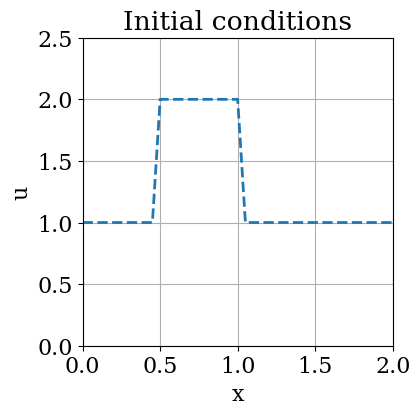

In [11]:
# Plot the initial conditions.
plt.figure(figsize=(4.0, 4.0))
plt.title('Initial conditions')
plt.xlabel('x')
plt.ylabel('u')
plt.grid()
plt.plot(x, u0, color='C0', linestyle='--', linewidth=2)
plt.xlim(0.0, L)
plt.ylim(0.0, 2.5);

Alterando apenas uma linha de código na solução de convecção linear, podemos agora obter a solução não linear: a linha que corresponde à equação discreta agora tem `un[i]` no lugar onde antes tínhamos apenas ` c`. Então você poderia escrever algo como:

```Python
for n in range(1, nt):
   un = u.copy()
   for i in range(1, nx):
     u[i] = un[i] - un[i]*dt/dx*(un[i]-un[i-1])
```

Seremos mais inteligentes do que isso e usaremos o NumPy para atualizar todos os valores da grade espacial de uma só vez. Na verdade, não precisamos escrever uma linha de código que seja executada *para cada* valor de $u$ na grade espacial. Python pode atualizá-los todos de uma vez! Estude o código abaixo e compare-o com o acima. Aqui está um esboço útil, para ilustrar a operação de matriz - também chamada de operação "vetorizada" - para $u_i-u_{i-1}$.

<p align="center">
<img src="./images/11-vectorizedstencil.png" width=450 height=300 />
</p>

In [12]:
# Compute the solution using Euler's method and array slicing.
u = u0.copy()
for n in range(1, nt):
    u[1:] = u[1:] - dt / dx * u[1:] * (u[1:] - u[:-1])

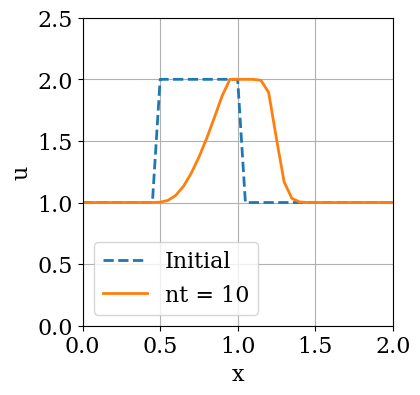

In [13]:
# Plot the solution after nt time steps
# along with the initial conditions.
plt.figure(figsize=(4.0, 4.0))
plt.xlabel('x')
plt.ylabel('u')
plt.grid()
plt.plot(x, u0, label='Initial',
            color='C0', linestyle='--', linewidth=2)
plt.plot(x, u, label='nt = {}'.format(nt),
            color='C1', linestyle='-', linewidth=2)
plt.legend()
plt.xlim(0.0, L)
plt.ylim(0.0, 2.5);

Humm. Isso é bem interessante: como no caso linear, vemos que perdemos os lados agudos de nossa onda quadrada inicial, mas há mais. Agora, a onda também perdeu simetria! Parece estar ficando para trás, enquanto a frente da onda está aumentando. Esta é outra forma de erro numérico, você pergunta? Não! É física!

### Vá mais fundo!

Pense no efeito de ter substituído a velocidade constante da onda $c$ pela velocidade variável dada pela solução $u$. Isso significa que diferentes partes da onda se movem em velocidades diferentes. Faça um esboço de uma onda inicial e pense onde a velocidade é maior e onde ela é menor...

## Estabilidade e condição CFL

Na seção anterior, estudamos a solução numérica das equações de convecção linear e não linear, usando o método das diferenças finitas. Você experimentou lá usando diferentes opções de parâmetros? Se o fez, você provavelmente se deparou com algum comportamento inesperado. Sua solução já explodiu (às vezes de uma maneira legal!)?

Aqui vamos explorar por que alterar os parâmetros de discretização pode afetar sua solução de maneira tão drástica.

Com os parâmetros de solução que sugerimos inicialmente, a malha espacial tinha 41 pontos e o tamanho do passo de tempo era de 0,25. Agora, vamos experimentar com o número de pontos na malha. O código abaixo corresponde ao caso de convecção linear, mas escrito em uma função para que possamos examinar facilmente o que acontece quando ajustamos apenas uma variável: **o tamanho da malha**.

In [14]:
def linear_convection(nx, L=2.0, c=1.0, dt=0.025, nt=20):
    """
    Solves the 1D linear convection equation
    with constant speed c in the domain [0, L]
    and plots the solution (along with the initial conditions).

    Parameters
    ----------
    nx : integer
        Number of grid points to discretize the domain.
    L : float, optional
        Length of the domain; default: 2.0.
    c : float, optional
        Convection speed; default: 1.0.
    dt : float, optional
        Time-step size; default: 0.025.
    nt : integer, optional
        Number of time steps to compute; default: 20.
    """
    # Discretize spatial grid.
    dx = L / (nx - 1)
    x = np.linspace(0.0, L, num=nx)
    # Set initial conditions.
    u0 = np.ones(nx)
    mask = np.where(np.logical_and(x >= 0.5, x <= 1.0))
    u0[mask] = 2.0
    # Integrate the solution in time.
    u = u0.copy()
    for n in range(1, nt):
        u[1:] = u[1:] - c * dt / dx * (u[1:] - u[:-1])
    # Plot the solution along with the initial conditions.
    plt.figure(figsize=(4.0, 4.0))
    plt.xlabel('x')
    plt.ylabel('u')
    plt.grid()
    plt.plot(x, u0, label='Initial',
                color='C0', linestyle='--', linewidth=2)
    plt.plot(x, u, label='nt = {}'.format(nt),
                color='C1', linestyle='-', linewidth=2)
    plt.legend()
    plt.xlim(0.0, L)
    plt.ylim(0.0, 2.5);

Agora vamos examinar os resultados do problema de convecção linear com uma malha cada vez mais fina. Vamos tentar 41, 61 e 71 pontos... depois vamos tentar 85. Veja o que acontece:

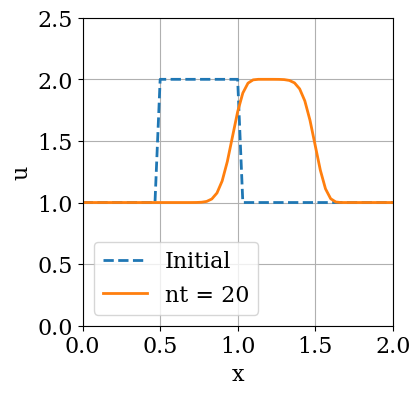

In [15]:
linear_convection(61)

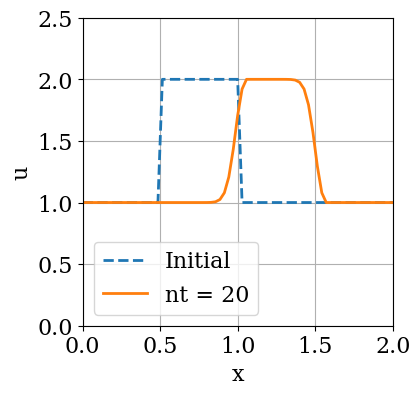

In [16]:
linear_convection(71)

Até aí tudo bem - à medida que refinamos a malha espacial, a onda fica mais quadrada, indicando que o erro de discretização está ficando menor. Mas o que acontece quando refinamos ainda mais a malha? Vamos tentar 85 pontos de malha.

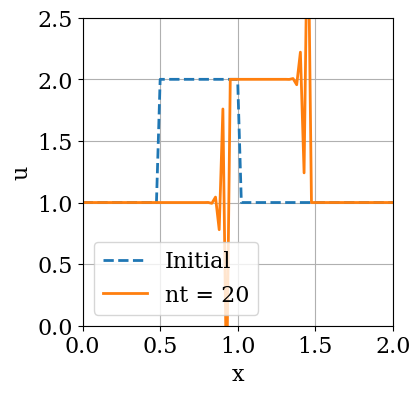

In [17]:
linear_convection(85)

Vixi! Isso não se parece em nada com a nossa função de chapéu original. Algo deu errado. É o mesmo código que executamos todas as vezes, então não é um bug!

### O que Aconteceu?

Para responder a essa pergunta, temos que pensar um pouco sobre o que estamos realmente implementando no código quando resolvemos a equação de convecção linear com o método forward-time/backward-space.

Em cada iteração do loop de tempo, usamos os dados existentes sobre a solução no tempo $n$ para calcular a solução no passo de tempo subsequente, $n+1$. Nos primeiros casos, o aumento no número de pontos de malha retornou resultados mais precisos. Houve menos erro de discretização e a onda de tradução parecia mais uma onda quadrada do que em nosso primeiro exemplo.

Cada iteração do loop de tempo avança a solução por um passo de tempo de comprimento $\Delta t$, que tinha o valor 0,025 nos exemplos acima. Durante esta iteração, avaliamos a solução $u$ em cada um dos pontos $x_i$ na malha. Mas na última trama, algo claramente deu errado.

O que aconteceu é que no período $\Delta t$, a onda está percorrendo uma distância maior que `dx`, e dizemos que a solução se torna *instável* nesta situação (esta afirmação pode ser provada formalmente, Veja abaixo). O comprimento `dx` do espaçamento da malha é inversamente proporcional ao número de pontos totais `nx`: pedimos mais pontos da malha, então `dx` ficou menor. Uma vez que `dx` ficou menor que $c\Delta t$—a distância percorrida pela solução numérica em um passo de tempo—não é mais possível para o esquema numérico resolver a equação corretamente!

<p align="center">
<img src="./images/11-CFLcondition.png" width=500 height=300 />
</p>

Considere a ilustração acima. O triângulo verde representa o _domínio de dependência_ do esquema numérico. De fato, para cada passo de tempo, a variável $u_i^{n+1}$ depende apenas dos valores $u_i^{n}$ e $u_{i-1}^{n}$.

Quando a distância $c\Delta t$ é menor que $\Delta x$, a linha característica traçada a partir da coordenada da malha $i,n+1$ fica _entre_ os pontos $i-1,n$ e $i,n$ na malha. Dizemos então que o _domínio matemático de dependência_ da solução do PDE original está contido no _domínio de dependência_ do esquema numérico.

Ao contrário, se $\Delta x$ for menor que $c\Delta t$, então a informação sobre a solução necessária para $u_i^{n+1}$ não está disponível no _domínio de dependência_ do esquema numérico, porque a linha característica traçada a partir da coordenada $i, n+1$ aterrissa _atrás_ do ponto $i-1,n$ na malha.

A seguinte condição garante que o domínio de dependência da equação diferencial esteja contido no domínio _numérico_ de dependência:

$$
\begin{equation*}
\sigma = \frac{c \Delta t}{\Delta x} \leq 1
\end{equation*}
$$

Como pode ser provado formalmente, a estabilidade da solução numérica requer que o tamanho do passo `dt` seja calculado em relação ao tamanho de `dx` para satisfazer a condição acima.

O valor de $c\Delta t/\Delta x$ é chamado de **Número de Courant-Friedrichs-Lewy** (número CFL), geralmente denotado por $\sigma$. O valor $\sigma_{\text{max}}$ que garantirá a estabilidade depende da discretização utilizada; para o esquema forward-time/backward-space, a condição de estabilidade é $\sigma<1$.

Em uma nova versão do nosso código—escrito _defensivamente_—, usaremos o número CFL para calcular o passo de tempo apropriado `dt` dependendo do tamanho de `dx`.

In [19]:
def linear_convection_cfl(nx, L=2.0, c=1.0, sigma=0.5, nt=20):
    """
    Solves the 1D linear convection equation
    with constant speed c in the domain [0, L]
    and plots the solution (along with the initial conditions).
    Here, the time-step size is calculated based on a CFL constraint.

    Parameters
    ----------
    nx : integer
        Number of grid points to discretize the domain.
    L : float, optional
        Length of the domain; default: 2.0.
    c : float, optional
        Convection speed; default: 1.0.
    sigma : float, optional
        CFL constraint; default: 0.5.
    dt : float, optional
        Time-step size; default: 0.025.
    nt : integer, optional
        Number of time steps to compute; default: 20.
    """
    # Discretize spatial grid.
    dx = L / (nx - 1)
    x = np.linspace(0.0, L, num=nx)
    # Compute the time-step size based on the CFL constraint.
    dt = sigma * dx / c
    # Set initial conditions.
    u0 = np.ones(nx)
    mask = np.where(np.logical_and(x >= 0.5, x <= 1.0))
    u0[mask] = 2.0
    # Integrate the solution in time.
    u = u0.copy()
    for n in range(1, nt):
        u[1:] = u[1:] - c * dt / dx * (u[1:] - u[:-1])
    # Plot the solution along with the initial conditions.
    plt.figure(figsize=(4.0, 4.0))
    plt.xlabel('x')
    plt.ylabel('u')
    plt.grid()
    plt.plot(x, u0, label='Initial',
                color='C0', linestyle='--', linewidth=2)
    plt.plot(x, u, label='nt = {}'.format(nt),
                color='C1', linestyle='-', linewidth=2)
    plt.legend()
    plt.xlim(0.0, L)
    plt.ylim(0.0, 2.5);

Agora, não importa quantos pontos usemos para a grade espacial: a solução sempre será estável!

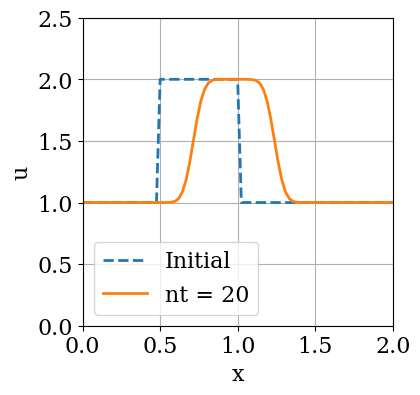

In [20]:
linear_convection_cfl(85)

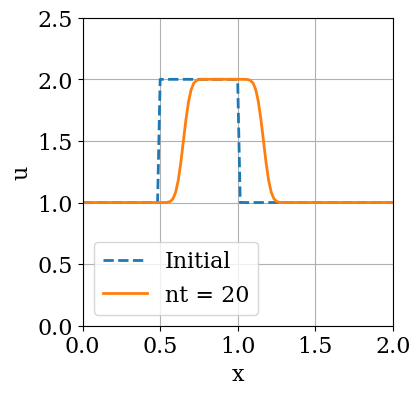

In [21]:
linear_convection_cfl(121)

Observe que à medida que o número de pontos `nx` aumenta, a onda convecta uma distância cada vez menor. O número de iterações de tempo para as quais avançamos a solução é mantido constante em `nt = 20`, mas dependendo do valor de `nx` e os valores correspondentes de `dx` e `dt`, uma janela de tempo menor está sendo examinada No geral.

Esse esquema numerico que usamos é o esquema `explicito`. Mas adiante vamos estudar como resolver esse problema usndo o esquema `implicito`

## Difusão 1D

Na seção anterior, estudamos a solução numérica das equações de convecção linear e não linear usando o método de diferenças finitas e aprendemos sobre a condição CFL. Agora, vamos olhar para a equation* de difusão unidimensional:

$$
\begin{equation*}
\frac{\partial u}{\partial t}= \nu \frac{\partial^2 u}{\partial x^2}
\end{equation*}
$$

onde $\nu$ é uma constante conhecida como *coeficiente de difusão*.

A primeira coisa que você deve notar é que esta equation* tem uma derivada de segunda ordem. Primeiro precisamos aprender o que fazer com isso!

### Discretizando as Derivadas de Segunda-ordem

A derivada de segunda ordem pode ser representada geometricamente como a linha tangente à curva dada pela primeira derivada. Vamos discretizar a derivada de segunda ordem com um esquema de Diferença Central: uma combinação de diferença direta e diferença inversa da primeira derivada. Considere a expansão de Taylor de $u_{i+1}$ e $u_{i-1}$ em torno de $u_i$:

$$
u_{i+1} = u_i + \Delta x \frac{\partial u}{\partial x}\big|_i + \frac{\Delta x^2}{2!} \frac{\partial ^2 u }{\partial x^2}\big|_i + \frac{\Delta x^3}{3!} \frac{\partial ^3 u}{\partial x^3}\big|_i + {\mathcal O}(\Delta x^4)
$$

$$
u_{i-1} = u_i - \Delta x \frac{\partial u}{\partial x}\big|_i + \frac{\Delta x^2}{2!} \frac{\partial ^2 u }{\partial x^2}\big|_i - \frac{\Delta x^3}{3!} \frac{\partial ^3 u}{\partial x^3}\big|_i + {\mathcal O}(\Delta x^4)
$$

Se adicionarmos essas duas expansões, as derivadas ímpares serão canceladas. Desprezando quaisquer termos de ${\mathcal O}(\Delta x^4)$ ou superior (e realmente, esses são muito pequenos), podemos reorganizar a soma dessas duas expansões para resolver a segunda derivada.

$$
u_{i+1} + u_{i-1} = 2u_i+\Delta x^2 \frac{\partial ^2 u}{\partial x^2}\big|_i + {\mathcal O}(\Delta x ^4)
$$

E finalmente:

$$
\begin{equation*}
\frac{\partial ^2 u}{\partial x^2}=\frac{u_{i+1}-2u_{i}+u_{i-1}}{\Delta x^2} + {\mathcal O}(\Delta x^2)
\end{equation*}
$$

A aproximação da diferença central da derivada de 2ª ordem é precisa de 2ª ordem.



### Voltando para Difusão

Podemos agora escrever a versão discretizada da equation* de difusão em 1D:

$$
\begin{equation*}
\frac{u_{i}^{n+1}-u_{i}^{n}}{\Delta t}=\nu\frac{u_{i+1}^{n}-2u_{i}^ {n}+u_{i-1}^{n}}{\Delta x^2}
\end{equation*}
$$

Como antes, notamos que uma vez que temos uma condição inicial, a única incógnita é $u_{i}^{n+1}$, então reorganizamos a equation* para isolar este termo:

$$
\begin{equation*}
u_{i}^{n+1}=u_{i}^{n}+\frac{\nu\Delta t}{\Delta x^2}(u_{i+1}^{n}-2u_{ i}^{n}+u_{i-1}^{n})
\end{equation*}
$$

Essa equation* discreta nos permite escrever um programa que avance uma solução no tempo, mas precisamos de uma condição inicial. Vamos continuar usando nossa favorita: a função hat. Então, em $t=0$, $u=2$ no intervalo $0,5\le x\le 1$ e $u=1$ em todos os outros lugares.

### Estabilidade da equation* de Difusão

A equation* de difusão não está livre de restrições de estabilidade. Assim como as equações de convecção linear e não linear, há um conjunto de parâmetros de discretização $\Delta x$ e $\Delta t$ que farão explodir a solução numérica. Para a equation* de difusão e a discretização usada aqui, a condição de estabilidade para difusão é

$$
\begin{equation*}
\nu \frac{\Delta t}{\Delta x^2} \leq \frac{1}{2}
\end{equation*}
$$

Estamos prontos para a trituração de números!

As próximas duas células de código inicializam o problema carregando as bibliotecas necessárias e, em seguida, definindo os parâmetros da solução e a condição inicial. Desta vez, não deixamos o usuário escolher apenas *qualquer* $\Delta t$; decidimos que isso não é seguro: as pessoas gostam de explodir coisas. Em vez disso, o código calcula um valor de $\Delta t$ que ficará na faixa estável, de acordo com a discretização espacial escolhida! Agora você pode experimentar diferentes parâmetros de solução para ver como a solução numérica muda, mas ela não vai explodir.

In [22]:
# Set parameters.
nx = 41  # number spatial grid points
L = 2.0  # length of the domain
dx = L / (nx - 1)  # spatial grid size
nu = 0.3  # viscosity
sigma = 0.2  # CFL limit
dt = sigma * dx**2 / nu  # time-step size
nt = 20  # number of time steps to compute

# Get the grid point coordinates.
x = np.linspace(0.0, L, num=nx)

# Set the initial conditions.
u0 = np.ones(nx)
mask = np.where(np.logical_and(x >= 0.5, x <= 1.0))
u0[mask] = 2.0

In [23]:
# Integrate in time.
u = u0.copy()
for n in range(nt):
    u[1:-1] = u[1:-1] + nu * dt / dx**2 * (u[2:] - 2 * u[1:-1] + u[:-2])

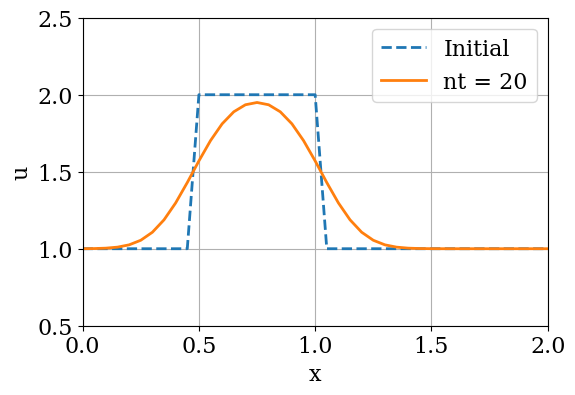

In [24]:
# Plot the solution after nt time steps
# along with the initial conditions.
plt.figure(figsize=(6.0, 4.0))
plt.xlabel('x')
plt.ylabel('u')
plt.grid()
plt.plot(x, u0, label='Initial',
            color='C0', linestyle='--', linewidth=2)
plt.plot(x, u, label='nt = {}'.format(nt),
            color='C1', linestyle='-', linewidth=2)
plt.legend(loc='upper right')
plt.xlim(0.0, L)
plt.ylim(0.5, 2.5);

### Animação

Observar os gráficos de antes e depois da onda em movimento é útil, mas é ainda melhor se pudermos vê-la mudando!

Primeiro, vamos importar o módulo `animation` do `matplotlib`, bem como um método de exibição IPython chamado `HTML` (mais sobre isso daqui a pouco).

##### Observação

Você também terá que instalar um codificador/decodificador de vídeo chamado `ffmpeg`.

Se você usa Linux ou OSX, pode instalar o ffmpeg usando conda:
```
conda install -c conda-forge ffmpeg
```

Se você usa o Windows, as instruções de instalação podem ser encontradas [aqui](http://adaptivesamples.com/how-to-install-ffmpeg-on-windows/).

In [25]:
from matplotlib import animation
from IPython.display import HTML

In [26]:
def diffusion(u0, sigma=0.5, nt=20):
    """
    Computes the numerical solution of the 1D diffusion equation
    over the time steps.
    
    Parameters
    ----------
    u0 : numpy.ndarray
        The initial conditions as a 1D array of floats.
    sigma : float, optional
        The value of nu * dt / dx^2;
        default: 0.5.
    nt : integer, optional
        The number of time steps to compute;
        default: 20.
    
    Returns
    -------
    u_hist : list of numpy.ndarray objects
        The history of the numerical solution.
    """
    u_hist = [u0.copy()]
    u = u0.copy()
    for n in range(nt):
        u[1:-1] = u[1:-1] + sigma * (u[2:] - 2 * u[1:-1] + u[:-2])
        u_hist.append(u.copy())
    return u_hist

Agora chamamos a função para armazenar o histórico da solução:

In [27]:
# Compute the history of the numerical solution.
u_hist = diffusion(u0, sigma=sigma, nt=nt)

Em seguida, criamos uma figura Matplotlib que queremos animar.
Por enquanto, a figura contém a solução inicial (nossa função cartola).

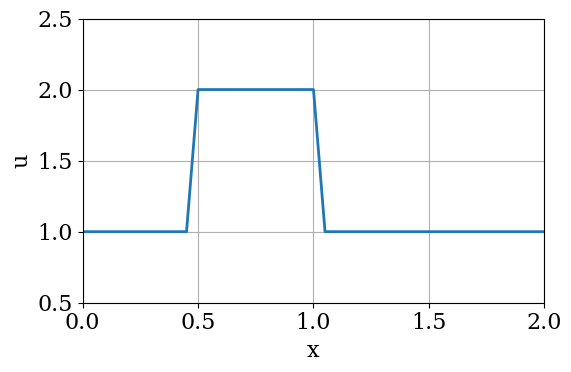

In [28]:
fig = plt.figure(figsize=(6.0, 4.0))
plt.xlabel('x')
plt.ylabel('u')
plt.grid()
line = plt.plot(x, u0,
                   color='C0', linestyle='-', linewidth=2)[0]
plt.xlim(0.0, L)
plt.ylim(0.5, 2.5)
fig.tight_layout()

**Nota**: `plt.plot()` pode (opcionalmente) retornar vários valores. Como estamos criando apenas uma linha, pedimos a linha "zeroth" (e apenas...) adicionando `[0]` após a chamada `plt.plot()`.

Agora que nossa figura foi inicializada, definimos uma função `update_plot` para atualizar os dados do gráfico de linha com base no índice de passo de tempo.

In [29]:
def update_plot(n, u_hist):
    """
    Update the line y-data of the Matplotlib figure.
    
    Parameters
    ----------
    n : integer
        The time-step index.
    u_hist : list of numpy.ndarray objects
        The history of the numerical solution.
    """
    fig.suptitle('Time step {:0>2}'.format(n))
    line.set_ydata(u_hist[n])

Em seguida, criamos um objeto `animation.FuncAnimation` com os seguintes argumentos:

* `fig`: o nome da nossa figura,
* `diffusion`: o nome da nossa função de resolução,
* `frames`: o número de frames para dra (que definimos igual a `nt`),
* `fargs`: argumentos extras para passar para a função `diffusion`,
* `interval`: o número de milissegundos em que cada quadro aparece.

In [30]:
# Create an animation.
anim = animation.FuncAnimation(fig, update_plot,
                               frames=nt, fargs=(u_hist,),
                               interval=100)

OK! Hora de exibir a animação.
Usamos o método de exibição `HTML` que importamos acima e o método `to_html5_video` do objeto de animação para torná-lo compatível com a web.

In [31]:
# Display the video.
HTML(anim.to_html5_video())

## Equação de Burgers

Aprendemos sobre a solução de diferenças finitas para as equações de convecção linear e não linear e a equação de difusão. É hora de combinar tudo isso em um: *equação de Burgers*. As maravilhas da *reutilização de código*!

Antes de continuar, certifique-se de ter concluído as lições anteriores, isso facilitará sua vida. Você deve ter escrito suas próprias versões dos códigos em Jupyter Notebooks ou scripts Python limpos e separados.

Você pode ler sobre a equação dde Burgers em sua [página da wikipedia](http://en.wikipedia.org/wiki/Burgers'_equation). A equação de Burgers em uma dimensão espacial se parece com isso:

$$
\begin{equation*}
\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = \nu \frac{\partial ^2u}{\partial x^2}
\end{equation*}
$$

Como você pode ver, é uma combinação de convecção não linear e difusão. É surpreendente o quanto você aprende com essa pequena equation*!

Podemos discretizá-lo usando os métodos que já detalhamos nos cadernos anteriores deste módulo. Usando a diferença para frente para o tempo, a diferença para trás para o espaço e nosso método de 2ª ordem para as segundas derivadas, obtém-se:

$$
\begin{equation*}
\frac{u_i^{n+1}-u_i^n}{\Delta t} + u_i^n \frac{u_i^n - u_{i-1}^n}{\Delta x} = \nu \frac {u_{i+1}^n - 2u_i^n + u_{i-1}^n}{\Delta x^2}
\end{equation*}
$$

Como antes, uma vez que temos uma condição inicial, a única incógnita é $u_i^{n+1}$. Vamos avançar no tempo da seguinte forma:

$$
\begin{equation*}
u_i^{n+1} = u_i^n - u_i^n \frac{\Delta t}{\Delta x} (u_i^n - u_{i-1}^n) + \nu \frac{\Delta t }{\Delta x^2}(u_{i+1}^n - 2u_i^n + u_{i-1}^n)
\end{equation*}
$$

### Condições iniciais e Valores de Contorno

Para examinar algumas propriedades interessantes da equação de Burgers, é útil usar condições iniciais e de contorno diferentes das que usamos nas etapas anteriores.

A condição inicial para este problema será:

$$
\begin{align*}
u &= -\frac{2 \nu}{\phi} \frac{\partial \phi}{\partial x} + 4 \\\
\phi(t=0) = \phi_0 &= \exp \bigg(\frac{-x^2}{4 \nu} \bigg) + \exp \bigg(\frac{-(x-2 \pi )^2}{4 \nu} \bigg)
\end{align*}
$$

Isso tem uma solução analítica, dada por:

$$
\begin{align*}
u &= -\frac{2 \nu}{\phi} \frac{\partial \phi}{\partial x} + 4 \\\
\phi &= \exp \bigg(\frac{-(x-4t)^2}{4 \nu (t+1)} \bigg) + \exp \bigg(\frac{-(x-4t - 2 \pi)^2}{4 \nu(t+1)} \bigg)
\end{align*}
$$

A condição de contorno será:

$$
\begin{equation*}
u(0) = u(2\pi)
\end{equation*}
$$

Isso é chamado de condição de contorno *periódica*. Prestar atenção! Isso causará um pouco de dor de cabeça se você não pisar com cuidado.

### Economizando tempo com SymPy


A condição inicial que estamos usando para a Equação de Burgers pode ser um pouco trabalhosa para avaliar manualmente. A derivada $\frac{\partial \phi}{\partial x}$ não é muito difícil, mas seria fácil descartar um sinal ou esquecer um fator de $x$ em algum lugar, então vamos usar SymPy para nos ajudar.

In [32]:
import sympy as sp

Vamos começar definindo símbolos para $x$, $\nu$ e $t$ e então digitar a equação completa para $\phi$. Devemos obter uma versão bem renderizada da nossa equação $\phi$.

In [33]:
x, nu, t = sp.symbols('x nu t')
phi = (sp.exp(-(x - 4 * t)**2 / (4 * nu * (t + 1))) +
       sp.exp(-(x - 4 * t - 2 * sp.pi)**2 / (4 * nu * (t + 1))))
phi

exp(-(-4*t + x - 2*pi)**2/(4*nu*(t + 1))) + exp(-(-4*t + x)**2/(4*nu*(t + 1)))

Talvez seja um pouco pequeno, mas parece certo. Agora, calcular nossa derivada parcial $\frac{\partial \phi}{\partial x}$ é uma tarefa trivial. Para derivar em relação a $x$, podemos simplesmente usar:

In [34]:
phiprime = phi.diff(x)
phiprime

-(-8*t + 2*x)*exp(-(-4*t + x)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)) - (-8*t + 2*x - 4*pi)*exp(-(-4*t + x - 2*pi)**2/(4*nu*(t + 1)))/(4*nu*(t + 1))

Agora que temos a versão Pythonica de nossa derivada, podemos terminar de escrever a equação de condição inicial completa e depois traduzi-la em uma expressão Python utilizável. Para isso, usaremos a função *lambdify*, que pega uma equação simbólica SymPy e a transforma em uma função que pode ser chamada.

In [35]:
u = -2 * nu * (phiprime / phi) + 4
u

-2*nu*(-(-8*t + 2*x)*exp(-(-4*t + x)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)) - (-8*t + 2*x - 4*pi)*exp(-(-4*t + x - 2*pi)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)))/(exp(-(-4*t + x - 2*pi)**2/(4*nu*(t + 1))) + exp(-(-4*t + x)**2/(4*nu*(t + 1)))) + 4

Para "lambdificar" essa expressão em uma função utilizável, informamos ao lambdify quais variáveis solicitar e a função à qual queremos conectá-las.

In [37]:
u_lamb = sp.lambdify((t, x, nu), u)
print(f'The value of u at t=1, x=4, nu=3 is {u_lamb(1, 4, 3)}')

The value of u at t=1, x=4, nu=3 is 3.49170664206445


### Voltar para a Equação doe Burgers

Agora que temos as condições iniciais configuradas, podemos prosseguir e terminar de configurar o problema. Podemos gerar o gráfico da condição inicial usando nossa função "lambdificada".

In [38]:
# Set parameters.
nx = 101  # number of spatial grid points
L = 2.0 * np.pi  # length of the domain
dx = L / (nx - 1)  # spatial grid size
nu = 0.07  # viscosity
nt = 100  # number of time steps to compute
sigma = 0.1  # CFL limit
dt = sigma * dx**2 / nu  # time-step size

# Discretize the domain.
x = np.linspace(0.0, L, num=nx)

Temos uma função `u_lamb` mas precisamos criar um array `u0` com nossas condições iniciais. `u_lamb` retornará o valor para qualquer momento $t$, posição $x$ e $nu$. Podemos usar um loop `for` para percorrer os valores de `x` para gerar o array `u0`. Esse código ficaria mais ou menos assim:

``` Python
u0 = numpy.empty(nx)

para i, x0 em enumerar(x):
     u0[i] = u_lamb(t, x0, nu)
```

Mas há uma maneira mais limpa e bonita de fazer isso -- `list comprehension`.

Podemos criar uma lista de todos os valores `u` apropriados digitando

``` Python
[u_lamb(t, x0, nu) para x0 em x]
```

Você pode ver que a sintaxe é semelhante ao loop `for`, mas leva apenas uma linha. Usar uma compreensão de lista criará... uma lista. Isso é diferente de um *array*, mas converter uma lista em um array é trivial usando `numpy.asarray()`.

Com a`list comprehension`em vigor, as três linhas de código acima se tornam uma:

``` Python
u = np.asarray([u_lamb(t, x0, nu) para x0 em x])
```

In [39]:
# Set initial conditions.
t = 0.0
u0 = np.array([u_lamb(t, xi, nu) for xi in x])
u0

array([4.        , 4.06283185, 4.12566371, 4.18849556, 4.25132741,
       4.31415927, 4.37699112, 4.43982297, 4.50265482, 4.56548668,
       4.62831853, 4.69115038, 4.75398224, 4.81681409, 4.87964594,
       4.9424778 , 5.00530965, 5.0681415 , 5.13097336, 5.19380521,
       5.25663706, 5.31946891, 5.38230077, 5.44513262, 5.50796447,
       5.57079633, 5.63362818, 5.69646003, 5.75929189, 5.82212374,
       5.88495559, 5.94778745, 6.0106193 , 6.07345115, 6.136283  ,
       6.19911486, 6.26194671, 6.32477856, 6.38761042, 6.45044227,
       6.51327412, 6.57610598, 6.63893783, 6.70176967, 6.76460125,
       6.82742866, 6.89018589, 6.95176632, 6.99367964, 6.72527549,
       4.        , 1.27472451, 1.00632036, 1.04823368, 1.10981411,
       1.17257134, 1.23539875, 1.29823033, 1.36106217, 1.42389402,
       1.48672588, 1.54955773, 1.61238958, 1.67522144, 1.73805329,
       1.80088514, 1.863717  , 1.92654885, 1.9893807 , 2.05221255,
       2.11504441, 2.17787626, 2.24070811, 2.30353997, 2.36637

Agora que temos as condições iniciais configuradas, podemos plotá-las para ver como $u(x,0)$ se parece:

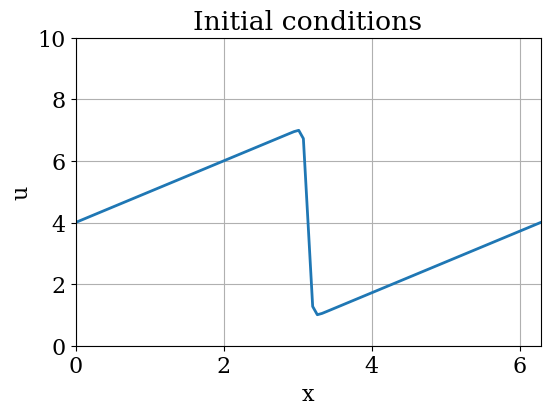

In [40]:
# Plot the initial conditions.
plt.figure(figsize=(6.0, 4.0))
plt.title('Initial conditions')
plt.xlabel('x')
plt.ylabel('u')
plt.grid()
plt.plot(x, u0, color='C0', linestyle='-', linewidth=2)
plt.xlim(0.0, L)
plt.ylim(0.0, 10.0);

Esta definitivamente não é a função de chapéu com a qual estamos lidando até agora. Chamamos isso de "função dente de serra". Vamos seguir em frente e ver o que acontece.

### Condições de Contorno Periódicas

Implementaremos a equação de Burgers com condições de contorno *periódicas*. Se você experimentar as funções de convecção linear e não linear e tornar a simulação mais longa (aumentando `nt`), você notará que a onda continuará se movendo para a direita até não aparecer mais no gráfico.

Com condições de contorno periódicas, quando um ponto chega ao lado direito do quadro, ele *enrola* de volta para a frente do quadro.

Lembre-se da discretização que elaboramos anteriormente:

$$
\begin{equation*}
u_i^{n+1} = u_i^n - u_i^n \frac{\Delta t}{\Delta x} (u_i^n - u_{i-1}^n) + \nu \frac{\Delta t }{\Delta x^2}(u_{i+1}^n - 2u_i^n + u_{i-1}^n)
\end{equation*}
$$

O que $u_{i+1}^n$ *significa* quando $i$ já está no final do quadro?

Pense nisso por um minuto antes de prosseguir.

In [41]:
# Integrate the Burgers' equation in time.
u = u0.copy()
for n in range(nt):
    un = u.copy()
    # Update all interior points.
    u[1:-1] = (un[1:-1] -
               un[1:-1] * dt / dx * (un[1:-1] - un[:-2]) +
               nu * dt / dx**2 * (un[2:] - 2 * un[1:-1] + un[:-2]))
    # Update boundary points.
    u[0] = (un[0] -
            un[0] * dt / dx * (un[0] - un[-1]) +
            nu * dt / dx**2 * (un[1] - 2 * un[0] + un[-1]))
    u[-1] = (un[-1] -
            un[-1] * dt / dx * (un[-1] - un[-2]) +
            nu * dt / dx**2 * (un[0] - 2 * un[-1] + un[-2]))

In [42]:
# Compute the analytical solution.
u_analytical = np.array([u_lamb(nt * dt, xi, nu) for xi in x])

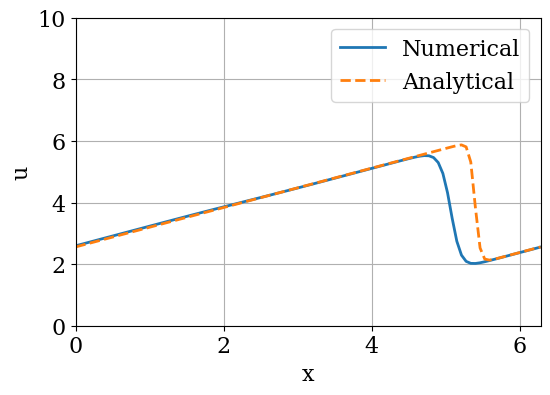

In [43]:
# Plot the numerical solution along with the analytical solution.
plt.figure(figsize=(6.0, 4.0))
plt.xlabel('x')
plt.ylabel('u')
plt.grid()
plt.plot(x, u, label='Numerical',
            color='C0', linestyle='-', linewidth=2)
plt.plot(x, u_analytical, label='Analytical',
            color='C1', linestyle='--', linewidth=2)
plt.legend()
plt.xlim(0.0, L)
plt.ylim(0.0, 10.0);

Vamos agora criar uma animação com o módulo `animation` do Matplotlib para observar como a solução numérica muda ao longo do tempo em comparação com a solução analítica.
Começamos importando o módulo do Matplotlib, bem como o método especial de exibição `HTML`.

Criamos uma função `burgers` para calcular a solução numérica da equação de 1D Burgers ao longo do tempo. (A função retorna o histórico da solução: uma lista com elementos `nt`, cada um sendo a solução no domínio em um intervalo de tempo.)

In [44]:
def burgers(u0, dx, dt, nu, nt=20):
    """
    Computes the numerical solution of the 1D Burgers' equation
    over the time steps.
    
    Parameters
    ----------
    u0 : numpy.ndarray
        The initial conditions as a 1D array of floats.
    dx : float
        The grid spacing.
    dt : float
        The time-step size.
    nu : float
        The viscosity.
    nt : integer, optional
        The number of time steps to compute;
        default: 20.
    
    Returns
    -------
    u_hist : list of numpy.ndarray objects
        The history of the numerical solution.
    """
    u_hist = [u0.copy()]
    u = u0.copy()
    for n in range(nt):
        un = u.copy()
        # Update all interior points.
        u[1:-1] = (un[1:-1] -
                   un[1:-1] * dt / dx * (un[1:-1] - un[:-2]) +
                   nu * dt / dx**2 * (un[2:] - 2 * un[1:-1] + un[:-2]))
        # Update boundary points.
        u[0] = (un[0] -
                un[0] * dt / dx * (un[0] - un[-1]) +
                nu * dt / dx**2 * (un[1] - 2 * un[0] + un[-1]))
        u[-1] = (un[-1] -
                un[-1] * dt / dx * (un[-1] - un[-2]) +
                nu * dt / dx**2 * (un[0] - 2 * un[-1] + un[-2]))
        u_hist.append(u.copy())
    return u_hist

In [45]:
# Compute the history of the numerical solution.
u_hist = burgers(u0, dx, dt, nu, nt=nt)

In [46]:
# Compute the history of the analytical solution.
u_analytical = [numpy.array([u_lamb(n * dt, xi, nu) for xi in x])
                for n in range(nt)]

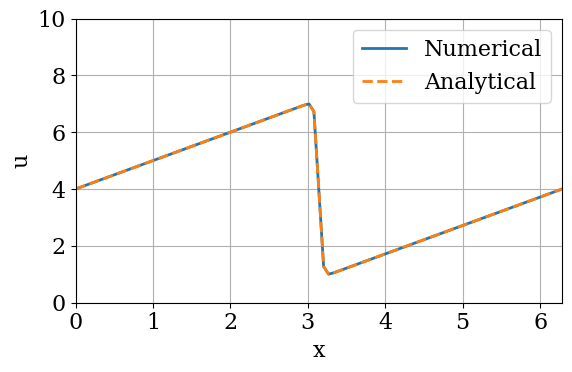

In [47]:
fig = plt.figure(figsize=(6.0, 4.0))
plt.xlabel('x')
plt.ylabel('u')
plt.grid()
u0_analytical = numpy.array([u_lamb(0.0, xi, nu) for xi in x])
line1 = plt.plot(x, u0, label='Numerical',
                    color='C0', linestyle='-', linewidth=2)[0]
line2 = plt.plot(x, u0_analytical, label='Analytical',
                    color='C1', linestyle='--', linewidth=2)[0]
plt.legend()
plt.xlim(0.0, L)
plt.ylim(0.0, 10.0)
fig.tight_layout()

In [48]:
def update_plot(n, u_hist, u_analytical):
    """
    Update the lines y-data of the Matplotlib figure.
    
    Parameters
    ----------
    n : integer
        The time-step index.
    u_hist : list of numpy.ndarray objects
        The history of the numerical solution.
    u_analytical : list of numpy.ndarray objects
        The history of the analytical solution.
    """
    fig.suptitle('Time step {:0>2}'.format(n))
    line1.set_ydata(u_hist[n])
    line2.set_ydata(u_analytical[n])

In [49]:
# Create an animation.
anim = animation.FuncAnimation(fig, update_plot,
                               frames=nt, fargs=(u_hist, u_analytical),
                               interval=100)

In [50]:
# Display the video.
HTML(anim.to_html5_video())

### Operação Vetorizada

Codificar esquemas de discretização usando operações de matriz pode ser um pouco trabalhoso. Requer muito mais esforço mental no front-end do que usar dois loops `for` aninhados. Então por que fazemos isso? Porque é rápido. Muito, muito rápido.

Aqui está a aparência do código Burgers usando dois loops `for` aninhados. É mais fácil escrever, além disso, só precisamos adicionar uma condição "especial" para implementar os limites periódicos.

No topo da célula, você verá o decorador `%%timeit`.
Isso é chamado de "magia celular". Ele executa a célula várias vezes e retorna o tempo médio de execução do código contido.

Vamos ver quanto tempo os loops `for` aninhados levam para terminar.

In [51]:
%%timeit
# Set initial conditions.
u = np.array([u_lamb(t, x0, nu) for x0 in x])
# Integrate in time using a nested for loop.
for n in range(nt):
    un = u.copy()
    # Update all interior points and the left boundary point.
    for i in range(nx - 1):
        u[i] = (un[i] -
                un[i] * dt / dx *(un[i] - un[i - 1]) +
                nu * dt / dx**2 * (un[i + 1] - 2 * un[i] + un[i - 1]))
    # Update the right boundary.
    u[-1] = (un[-1] -
             un[-1] * dt / dx * (un[-1] - un[-2]) +
             nu * dt / dx**2 * (un[0]- 2 * un[-1] + un[-2]))

16.3 ms ± 338 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Menos de 50 milissegundos. Nada mal, realmente.

Agora vamos olhar para a célula de código de operações de array. Observe que não mudamos nada, exceto que adicionamos a mágica `%%timeit` e também estamos redefinindo o array `u` para suas condições iniciais.

Isso leva mais tempo para codificar e temos que adicionar duas condições especiais para cuidar dos limites periódicos. Valeu a pena?

In [52]:
%%timeit
# Set initial conditions.
u = np.array([u_lamb(t, xi, nu) for xi in x])
# Integrate in time using array operations.
for n in range(nt):
    un = u.copy()
    # Update all interior points.
    u[1:-1] = (un[1:-1] -
               un[1:-1] * dt / dx * (un[1:-1] - un[:-2]) +
               nu * dt / dx**2 * (un[2:] - 2 * un[1:-1] + un[:-2]))
    # Update boundary points.
    u[0] = (un[0] -
            un[0] * dt / dx * (un[0] - un[-1]) +
            nu * dt / dx**2 * (un[1] - 2 * un[0] + un[-1]))
    u[-1] = (un[-1] -
            un[-1] * dt / dx * (un[-1] - un[-2]) +
            nu * dt / dx**2 * (un[0] - 2 * un[-1] + un[-2]))

2.35 ms ± 78.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Sim, vale absolutamente a pena. Isso é um aumento de velocidade de oito vezes. Para este exercício, você provavelmente não perderá os 40 milissegundos extras se usar os loops `for` aninhados, mas e quanto a uma simulação que precisa passar por milhões e milhões de iterações? Então esse pequeno esforço extra no início definitivamente valerá a pena.